In [2]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [7]:
db = '../example_data/heilgarten.db'

In [ ]:
from os import remove
remove(db)

In [8]:
from metadaten import metadaten

In [9]:
#metadaten(db, '../example_data/bildverband2/*.JPG')
metadaten(db, '/mnt/hdd/Bilder/Bilder/2022/2022-10-23_Heilgarten/Aussenbereich/**/*.JPG')
metadaten(
    db, '/mnt/hdd/Bilder/Bilder/2022/2022-10-23_Heilgarten/Aussenbereich/**/*.jpg')


Metadaten
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild


In [10]:
metadaten(
    db, '/mnt/hdd/Bilder/Bilder/2022/2022-10-23_Heilgarten/Innenraum/**/*.JPG')
metadaten(
    db, '/mnt/hdd/Bilder/Bilder/2022/2022-10-23_Heilgarten/Innenraum/**/*.jpg')

Metadaten
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Metadaten
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild
Bild


In [ ]:
from find_aruco import find_aruco
find_aruco(db)

In [ ]:
from find_sift import find_sift
find_sift(db)


In [ ]:
from match_sift import match_sift
match_sift(db)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
16
Computed essential matrix: [[-0.04126118 -1.         -0.00542202]
 [ 1.03692089 -0.15504658 -0.43542845]
 [ 0.02966691  0.36381172 -0.00413211]]
[[ 0.99517716  0.08642683  0.0463985   0.38443504]
 [-0.08759799  0.9958709   0.02382723 -0.02086631]
 [-0.0441476  -0.02777673  0.99863879  0.92291619]]
9


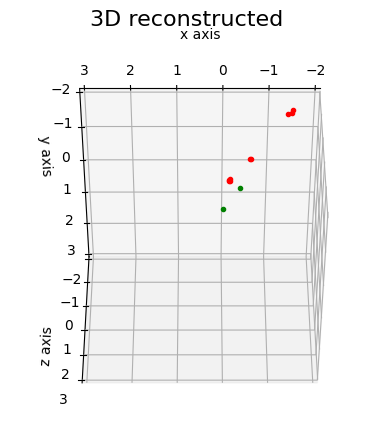

In [4]:
from naeherungswerte import naeherungswerte
naeherungswerte(db)

In [3]:
from bundle_adjustment import  bundle_adjustment
bundle_adjustment(db)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
from join_nextpictures import join_nextpictures
join_nextpictures(db)


In [ ]:
from join_nextcoords import join_nextcoords
join_nextcoords(db)

In [4]:
con = sqlite3.connect(db)
cur = con.cursor()

In [10]:
cur.execute("""SELECT lx,ly,lz FROM passpunkte WHERE lx is not null""")
coord = np.array(cur.fetchall())
cur.execute("""SELECT lx,ly,lz FROM bilder WHERE lx is not null""")
cams = np.array(cur.fetchall())

%matplotlib qt
fig = plt.figure()
fig.suptitle('3D reconstructed', fontsize=16)
ax = fig.add_subplot(projection='3d')
ax.plot(coord[:, 0], coord[:, 1], coord[:, 2], 'r.')
ax.plot(-cams[:, 0], -cams[:, 1], -cams[:, 2], 'b.')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.view_init(elev=135, azim=90)
plt.axis('square')
plt.show()


qt.qpa.wayland: Wayland does not support QWindow::requestActivate()


In [ ]:
cur.execute(
    """UPDATE kameras SET fx = 0.666, fy = 0.666, x0 = 0.5, y0 = 0.375""")
cur.execute("""UPDATE bilder SET lx = NULL, ly = NULL, lz = NULL, lrx = NULL, lry = NULL, lrz = NULL""")
cur.execute(
    """UPDATE passpunkte SET lx = NULL, ly = NULL, lz = NULL""")
#cur.execute("""UPDATE passpunktpos SET x = x*4000. ,y = y*4000.""")
con.commit()

In [5]:
cur.execute(
    """UPDATE bilder SET lx = NULL, ly = NULL, lz = NULL, lrx = NULL, lry = NULL, lrz = NULL""")
cur.execute(
    """UPDATE passpunkte SET lx = NULL, ly = NULL, lz = NULL""")
#cur.execute("""UPDATE passpunktpos SET x = x/1000. ,y = y/1000.""")
con.commit()


In [ ]:
cur.execute("DELETE FROM passpunkte")
cur.execute("DELETE FROM passpunktpos")
con.commit()

In [6]:
cur.execute("SELECT pfad from bilder")
for bild in cur.fetchall():
    d = np.load(bild[0]+'.npz')
    pt = d['pt']/600
    np.savez_compressed(bild[0]+'.npz', pt = pt, id=d['id'], desc = d['desc'])


In [9]:
cur.execute("DELETE FROM passpunktpos WHERE pid in (SELECT pid FROM passpunkte WHERE type = 'SIFT')")
cur.execute("DELETE FROM passpunkte WHERE type = 'SIFT'")
